## Introduction
Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.
### 3 types of data source as follows:
#### Enhanced Twitter Archive
The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets
#### Additional Data via the Twitter API
Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Get the data via Twitter API
#### Image Predictions File
Every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images). 

## Analysis and Insight of weRateDog tweet data
The analysis and insight is based on the combination of above 3 types of data source. There are 5 viz included in this analysis report.


In [14]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json

In [15]:
df_analysis = pd.read_csv('twitter_archive_master.csv')
df_analysis.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'timestamp_date', 'timestamp_time',
       'rating', 'stage', 'timestamp_hour', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count', 'retweeted'],
      dtype='object')

### Viz 1: Is there any relationship between retweet and favorites of breeds of dog?

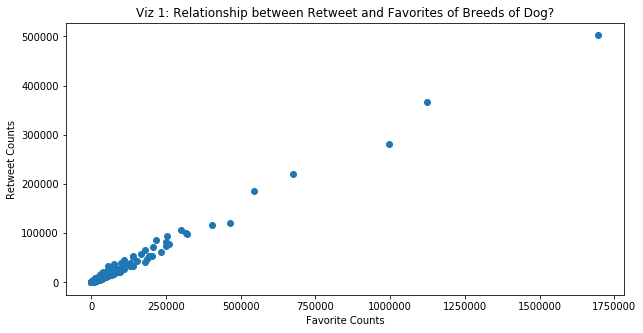

In [16]:
#df_2 = df_analysis[['tweet_id','retweet_count','favorite_count']]
df_2 = df_analysis.groupby('p1').agg({'retweet_count': 'sum', 'favorite_count': 'sum'})
plt.figure(figsize=(10,5))
y=df_2.retweet_count
x=df_2.favorite_count

plt.scatter(x,y,marker="o")
plt.title('Viz 1: Relationship between Retweet and Favorites of Breeds of Dog?')
plt.ylabel('Retweet Counts')
plt.xlabel("Favorite Counts")
plt.show()

As shown in the viz 1 above<br>
1)there is a strong correlation between retweet and favorites. <br>
2)Favoirte counts is higher than Retweet counts. If a breed of dog gets favorite, it's probably getting more retweet.<br>
3)Most breeds get favorite counts under 250,000, and retweet under 100,00. There are several breeds beyond these boundaries. Let's take a look at those ones in Viz 2.

### Viz 2: What are Top 10 breeds of dog who get highest retweet and its favorite respectively?

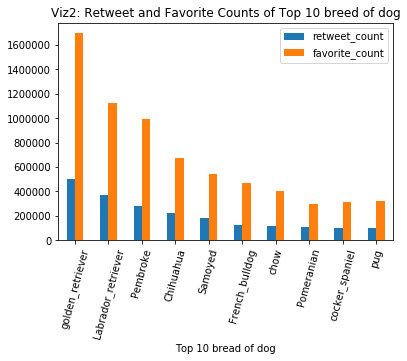

In [17]:
df_3 = df_2.sort_values(by='retweet_count', ascending = False).head(10)
ax = df_3.plot(kind='bar', rot=75)
ax.set_xlabel('Top 10 bread of dog')
plt.title("Viz2: Retweet and Favorite Counts of Top 10 breed of dog")
plt.show()

As shown in Viz 2, these top10 breeds get highest favorite and retweet. They're stars and get most attention.

### Viz 3: Dog rating distribution of each stage

Text(0.5, 1.0, 'Viz 3: Rating Distribution by Dog Stage')

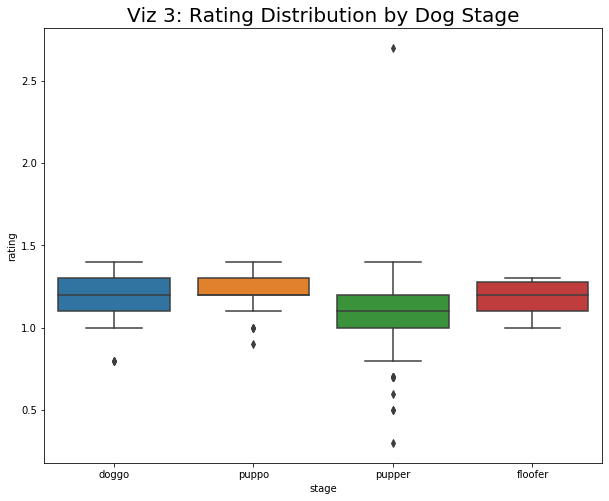

In [19]:

# refernece https://python-graph-gallery.com/38-show-number-of-observation-on-boxplot/
df_5 = df_analysis.query('stage!="None"')
plt.figure(figsize=(10,8))
x= df_5['stage']
y= df_5['rating']
boxplt = sns.boxplot(x,y, data=df_5)
plt.title("Viz 3: Rating Distribution by Dog Stage",size=20)

As shown in Viz 3 above<br>
1) Gives us how rating in each stage are spread out.<br>
2) Puppo stage gets rating in the approx. range of (1.1 to 1.4) which is the most popular stage as compared to other stages.<br>
3) Doggo and flooter stage has rating range similarly.<br>
4) The exception of being pupper because Rating in pupper is a little bit lower, and has more outlier rating.<br>

### Viz 4: In which hours people like to tweet their dogs and retweet others' dogs?

In [23]:
df_1 = df_analysis.groupby('timestamp_hour')['retweet_count'].agg(RetweetSum='sum',TweetCount='count')

Text(0.5, 1.0, 'Viz 4: In Which Hours Peopel like to tweet their dog and Retweet?')

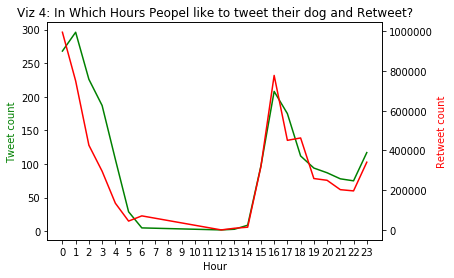

In [24]:
# i need a line chart to show tweet and retweet in each day
y1 = df_1['TweetCount']
y2 = df_1['RetweetSum']

fig, ax1 =plt.subplots()
ax2 = ax1.twinx()

ax1.plot(y1, 'g')
ax2.plot(y2, 'r')

plt.xticks(range(0,24))

ax1.set_xlabel('Hour')
ax1.set_ylabel('Tweet count', color='g')
ax2.set_ylabel('Retweet count', color='r')
plt.title("Viz 4: In Which Hours Peopel like to tweet their dog and Retweet?")

As shown in Viz 4 above<br>
1)People like tweeting and retweeting dog at 0-2am, 16pm, 23pm. Retweet also happens at the same time.<br>
2)During 14~16pm, 22pm-1am tweet and retweet rises significately.

### Viz 5: What's the trend of tweet?

Text(0.5, 1.0, 'Viz 5: Tweet Counts Trend of weRateDog over YearMonth')

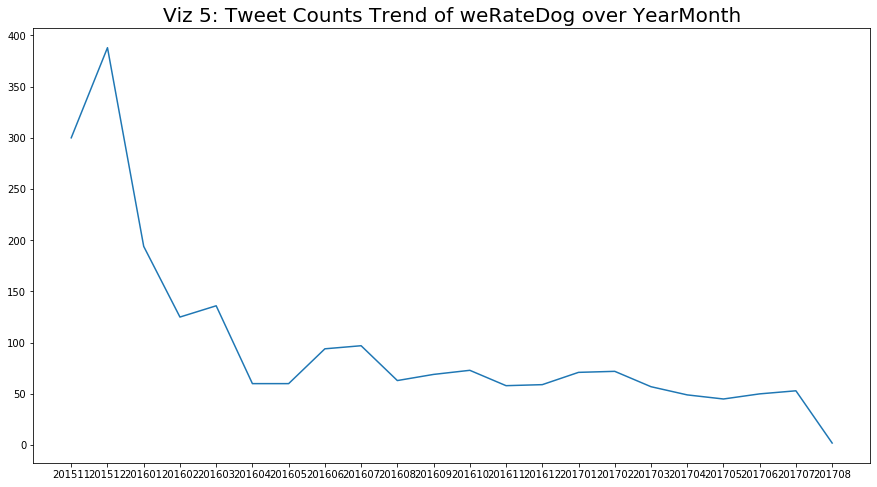

In [27]:
df_analysis['YearMonth'] = df_analysis['timestamp_date'].astype(str).str[:6]
df_analysis['YearMonth']
df_6 = df_analysis.groupby('YearMonth').agg({'tweet_id':'count'}).reset_index()
plt.figure(figsize=(15,8))
x = df_6['YearMonth']
y = df_6['tweet_id']
plt.plot(x,y)
plt.title("Viz 5: Tweet Counts Trend of weRateDog over YearMonth",size=20)



As shown in Viz 5<br>
1)the overall trend of Tweets decreased over time, from 201511 to 201708.<br>
2)The twitter account started in 2015. It became popular in the first two months 201511 and 201512, with 300 and 390 tweets respectively.<br>
3)Tweets decreased a lot compared to when weRateDog got started.

### Viz 6: What's the trend of retweet and favoirte counts over YearMonth?

Text(0.5, 1.0, 'Viz 6: Trend of Retweet and Favorite Counts over YearMonth')

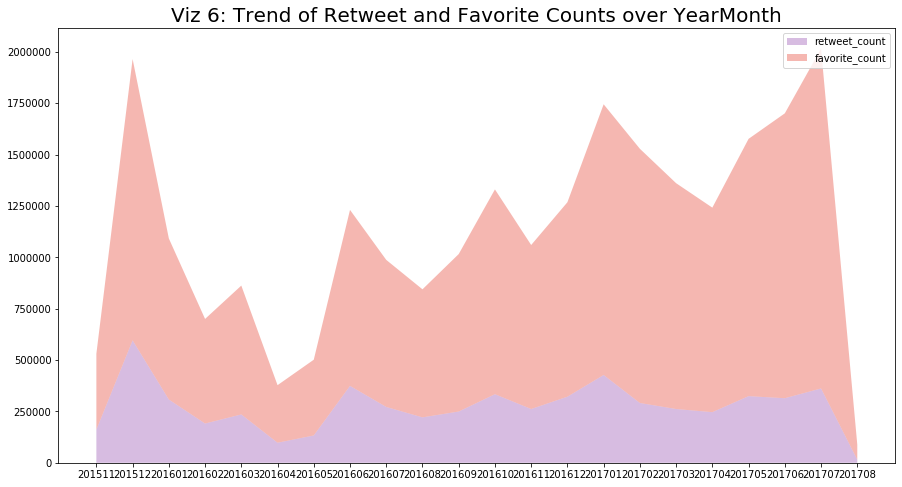

In [29]:
# tweet,retweet and favorite
df_4 = df_analysis.groupby('YearMonth').agg({'retweet_count':'sum', 'favorite_count':'sum'}).reset_index()

# reference https://python-graph-gallery.com/253-control-the-color-in-stacked-area-chart/
plt.figure(figsize=(15,8))

x=df_4['YearMonth']

y1=df_4['retweet_count']  
y2=df_4['favorite_count']
pal = ["#9b59b6", "#e74c3c", "#34495e"]
plt.stackplot(x,y1,y2, labels=['retweet_count','favorite_count'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.title("Viz 6: Trend of Retweet and Favorite Counts over YearMonth", size=20)


As shown in Viz 6 above <br>
Reweet and favorate illustrates increased. Compare with Viz 5, A strong contrast in decreased tweet count and increased retweet&Favorite that brings me an idea. weRateDog lost end-users who tweeted their dogs but it obtained end-users who kept retweeting and giving a like. But would the trend keep going if no more new tweet was tweeted? I belive Yes!! Because people love dogs. LOL:)